## Packages

In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
#import statsmodels.graphics.tsaplots as sgt
#import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from pmdarima.arima import auto_arima
!pip install arch
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 26.6 MB/s 
     |████████████████████████████████| 9.8 MB 38.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 21.2 MB/s 


In [ ]:
import statsmodels.api as sm

## Loading the data

In [ ]:
# Cargamos los datos
#index_col=0
df = pd.read_csv('./BTCUSDT1h-18.8.17-31-7-22.csv',index_col=0, parse_dates=True)
df=df.drop(columns=['ignore'])
df=df.drop(columns=['open_time'])
df=df.drop(columns=['close_time'])
df.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,353504.410409,268,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,318327.529415,243,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,230478.628087,219,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,273495.006480,306,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,216512.633035,267,45.826187,195365.989365


In [ ]:
#Variables

n_obs=math.floor(72)
freq='1h'

#adaptación
df=df.asfreq(freq)
df=df.fillna(method='ffill')
df.isnull().sum()
#Check
nan_rows = df[df.isnull().any(1)]
nan_rows
df_comp = df.copy()
df.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,353504.410409,268.0,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,318327.529415,243.0,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,230478.628087,219.0,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,273495.006480,306.0,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,216512.633035,267.0,45.826187,195365.989365


## Creating Returns

In [ ]:
df_comp['ret_open'] = df_comp.open.pct_change(1).mul(100)
df_comp['ret_high'] = df_comp.high.pct_change(1).mul(100)
df_comp['ret_low'] = df_comp.low.pct_change(1).mul(100)
df_comp['ret_close'] = df_comp.close.pct_change(1).mul(100)
df_comp['ret_volume'] = df_comp.volume.pct_change(1).mul(100)
df_comp['ret_qav'] = df_comp.qav.pct_change(1).mul(100)
df_comp['ret_num_trades'] = df_comp.num_trades.pct_change(1).mul(100)
df_comp['ret_taker_base_vol'] = df_comp.taker_base_vol.pct_change(1).mul(100)
df_comp['ret_taker_quote_vol'] = df_comp.taker_quote_vol.pct_change(1).mul(100)

In [ ]:
df_comp['norm_ret_open'] = df_comp.ret_open.div(df_comp.ret_open[1])*100
df_comp['norm_ret_high'] = df_comp.ret_high.div(df_comp.ret_high[1])*100
df_comp['norm_ret_low'] = df_comp.ret_low.div(df_comp.ret_low[1])*100
df_comp['norm_ret_ret_close'] = df_comp.ret_close.div(df_comp.ret_close[1])*100
df_comp['norm_ret_volume'] = df_comp.ret_volume.div(df_comp.ret_volume[1])*100
df_comp['norm_ret_qav'] = df_comp.ret_qav.div(df_comp.ret_qav[1])*100
df_comp['norm_ret_num_trades'] = df_comp.ret_num_trades.div(df_comp.ret_num_trades[1])*100
df_comp['norm_ret_taker_base_vol'] = df_comp.ret_taker_base_vol.div(df_comp.ret_taker_base_vol[1])*100
df_comp['norm_ret_taker_quote_vol'] = df_comp.ret_taker_quote_vol.div(df_comp.ret_taker_quote_vol[1])*100

## Splitting the Data

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#train test una variable
df1 = df.drop(['open', 'high','low', 'volume', 'qav','num_trades', 'taker_base_vol','taker_quote_vol'], axis=1)
df1_train, df1_test = df1[0:-n_obs], df1[-n_obs:]
#train tests con retrasos
df_comp_train, df_comp_test =df_comp[0:-n_obs], df_comp[-n_obs:]

## Selección de fechas

In [ ]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date = "2022-07-28 01:59:59.999"
end_date = "2022-07-31 00:59:59.999	"

## Función para representar los resultados

In [ ]:
warnings.simplefilter('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

def show_graphp1(data,title):
    data.reset_index(inplace=True, drop=True)

    for col in data.columns:
        if col.lower().startswith('predicted_mean'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.title(title)
    plt.legend()
    plt.show()
    print ()
    print('Evaluated model:', title)
    print('Mean absolute error:', mean_absolute_error(data['close'].values,data['predicted_mean'].values))
    print('Root mean squared error:', np.sqrt(mean_squared_error(data['close'].values,data['predicted_mean'].values)))

In [ ]:
warnings.simplefilter('ignore')

def show_graphp2(data,title):
    data.reset_index(inplace=True, drop=True)
    data=data.iloc[43200:]

    for col in data.columns:
        if col.lower().startswith('predicted_mean'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.title(title)
    plt.legend()
    plt.show()
   

## Modelo AR

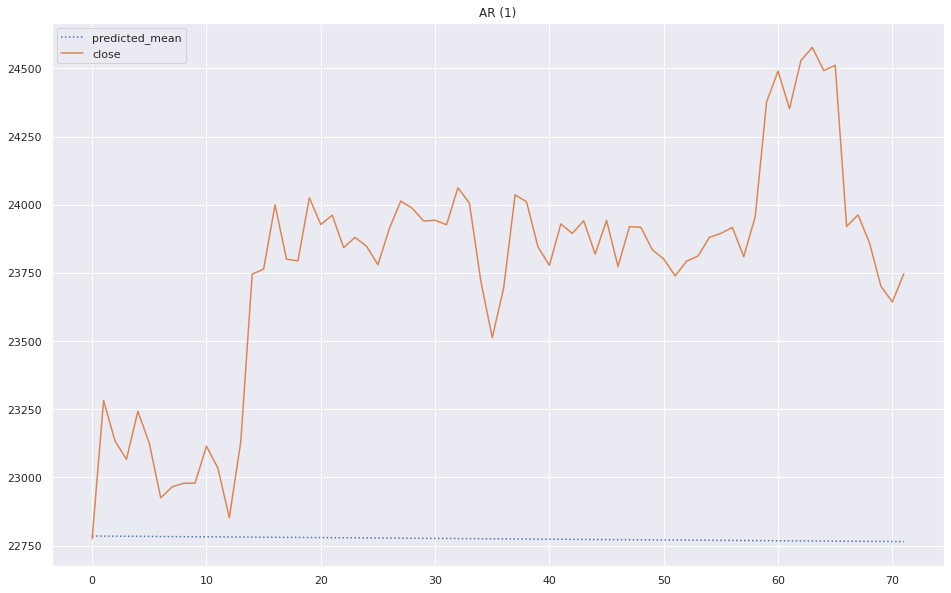


Evaluated model: AR (1)
Mean absolute error: 990.9394891972726
Root mean squared error: 1074.92003240442


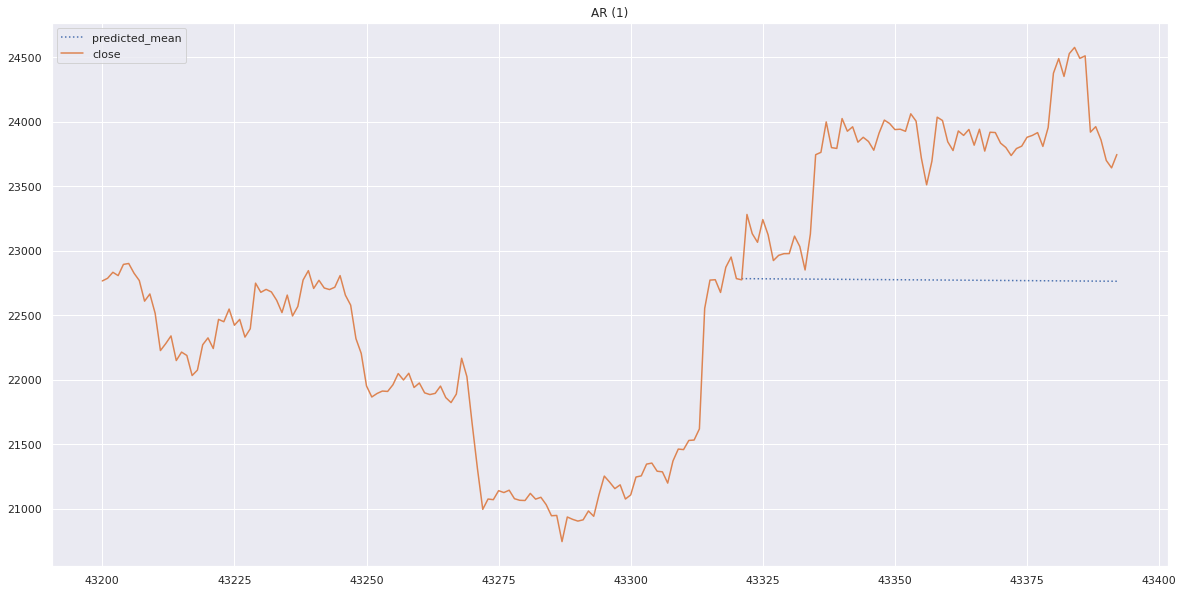

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close, order = (1,0,0))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date)
df_pred = df_pred.to_frame()
#df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'AR (1)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'AR (1)')

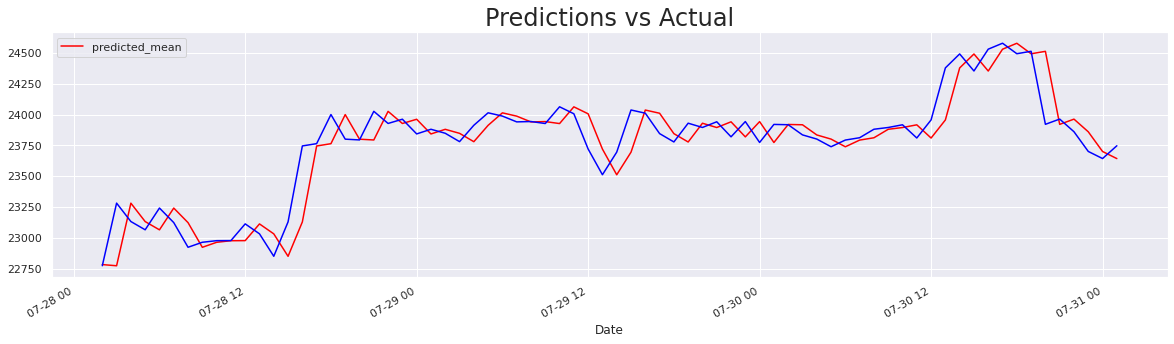

In [ ]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.close[start_date:end_date].plot(figsize = (20,5), color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

### Arima 5

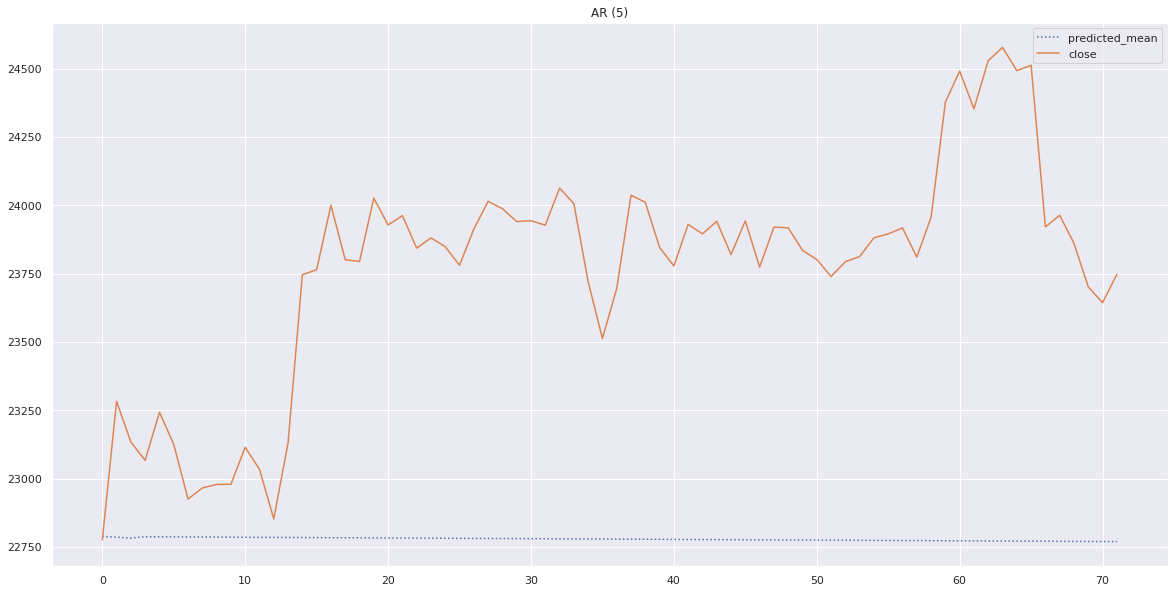


Evaluated model: AR (5)
Mean absolute error: 987.2374130704172
Root mean squared error: 1071.2259092283716


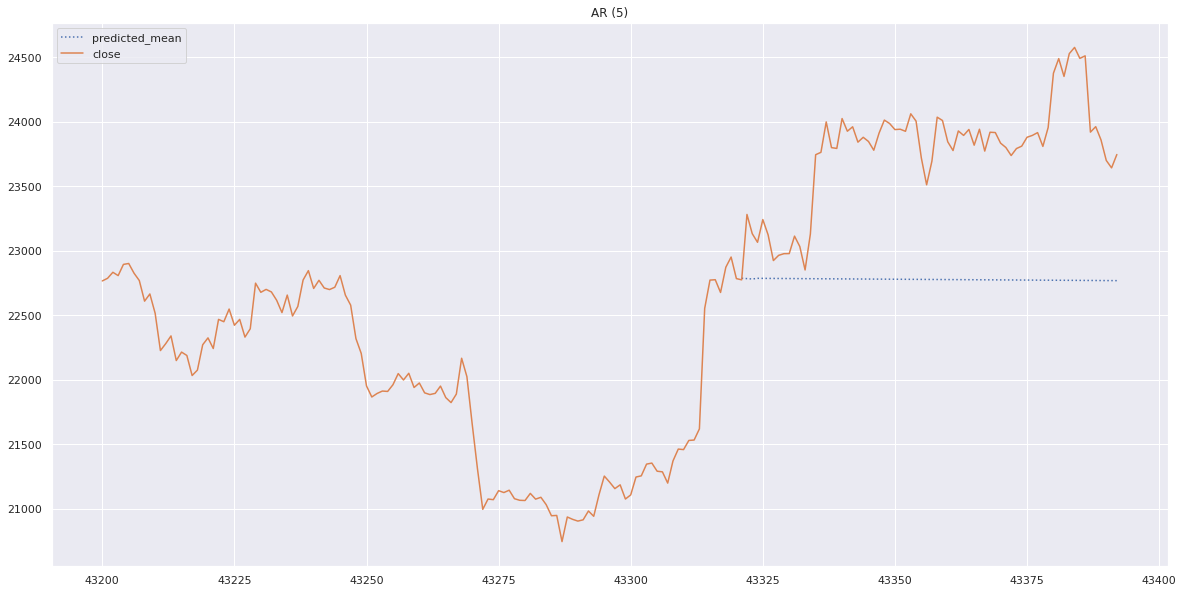

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close, order = (5,0,0))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date)
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'AR (5)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'AR (5)')

### MA

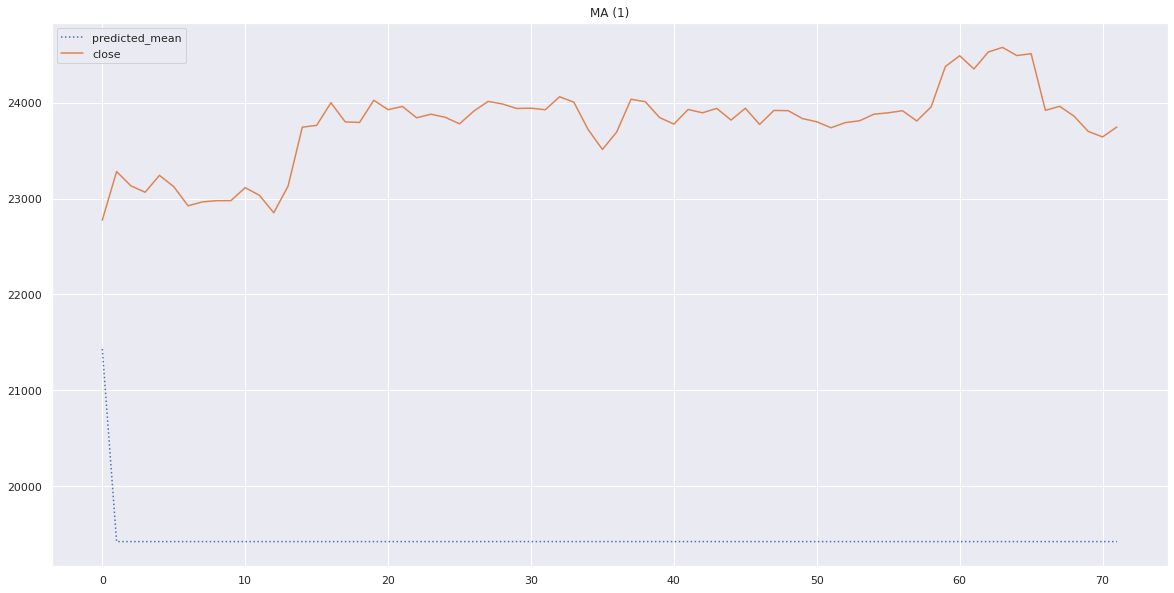


Evaluated model: MA (1)
Mean absolute error: 4314.963446616214
Root mean squared error: 4347.4055112618735


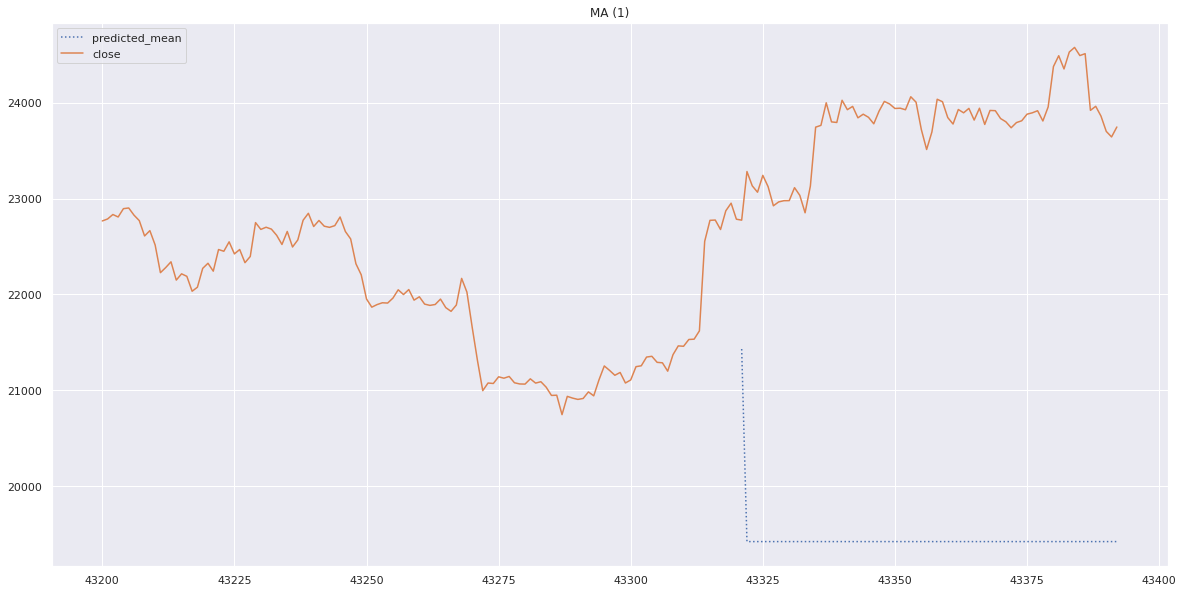

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close, order = (0,0,1))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date)
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'MA (1)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'MA (1)')

#MA 5

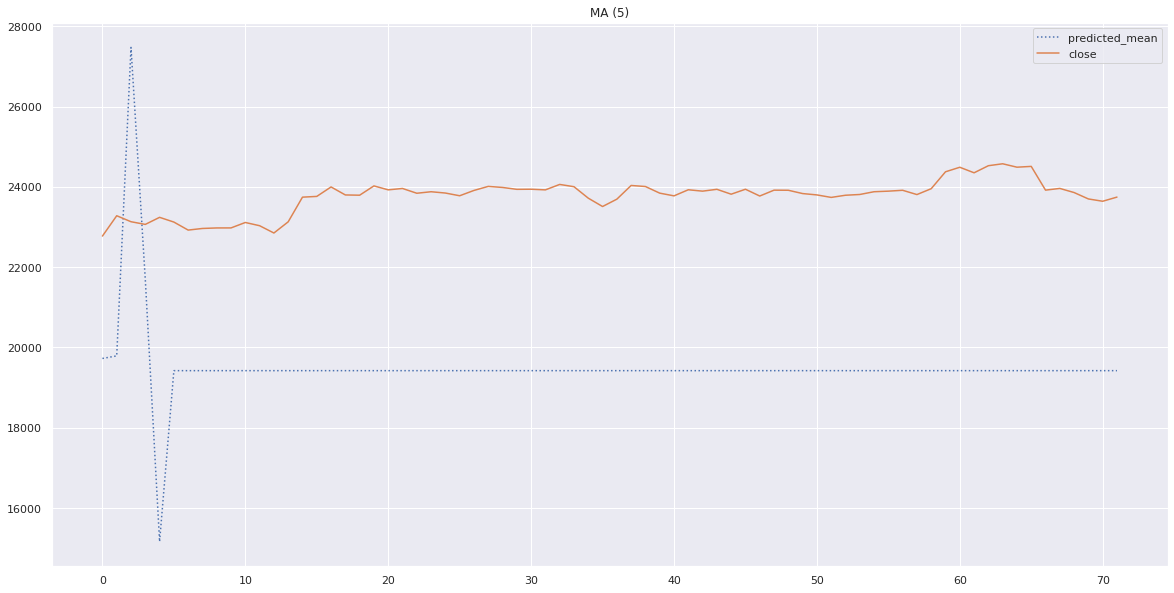


Evaluated model: MA (5)
Mean absolute error: 4369.879219325094
Root mean squared error: 4425.2019973998795


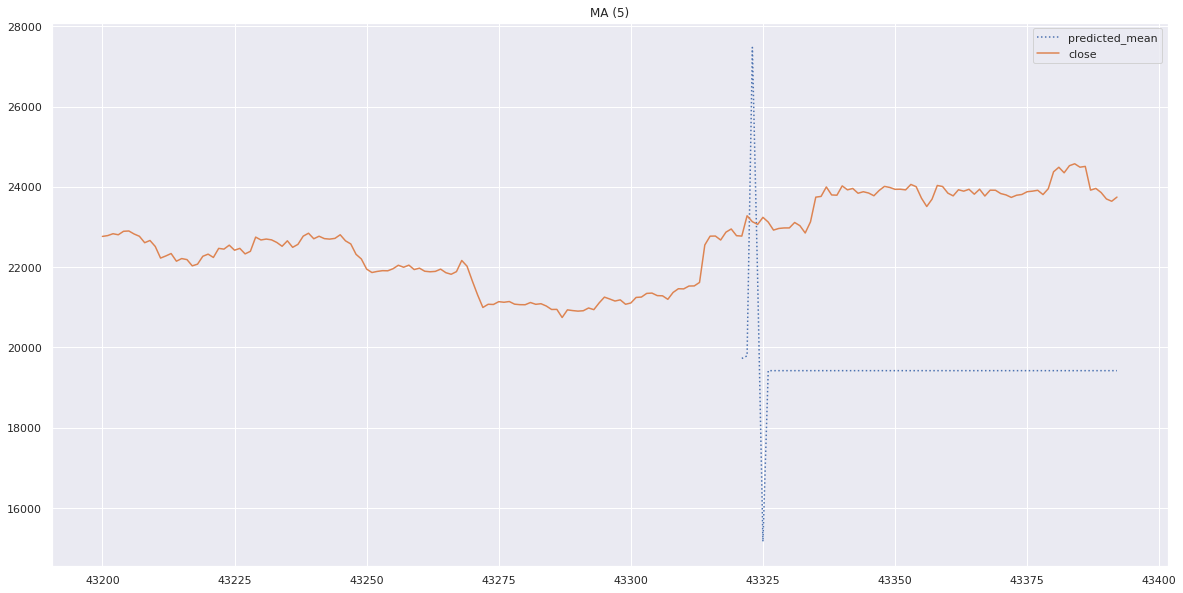

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close, order = (0,0,5))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date)
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'MA (5)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'MA (5)')

### ARMA

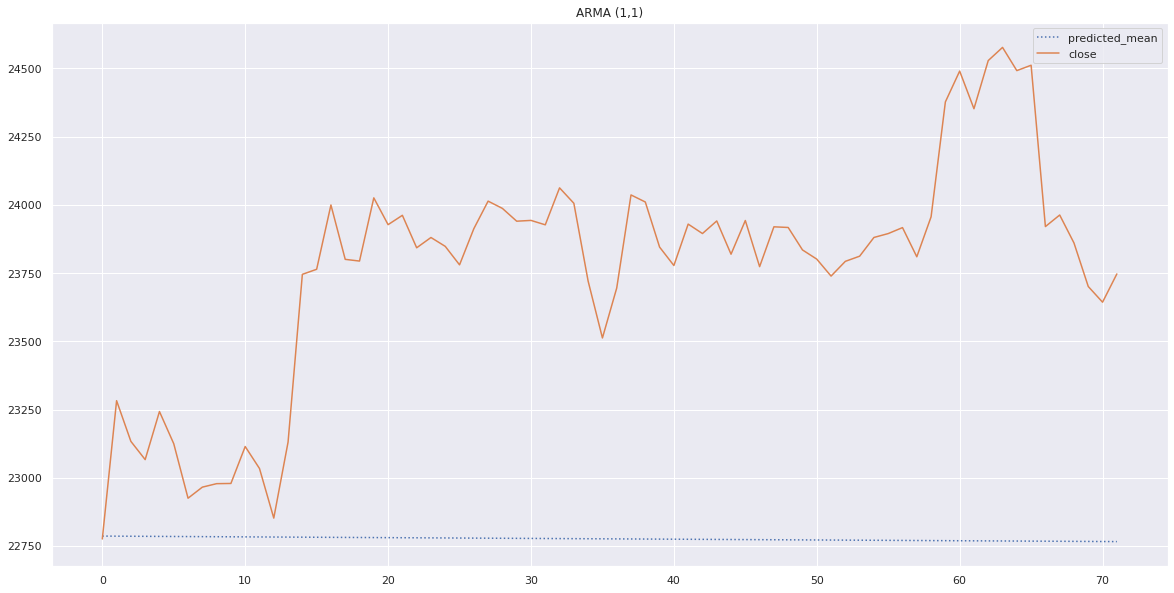


Evaluated model: ARMA (1,1)
Mean absolute error: 989.5998351981149
Root mean squared error: 1073.6332109085558


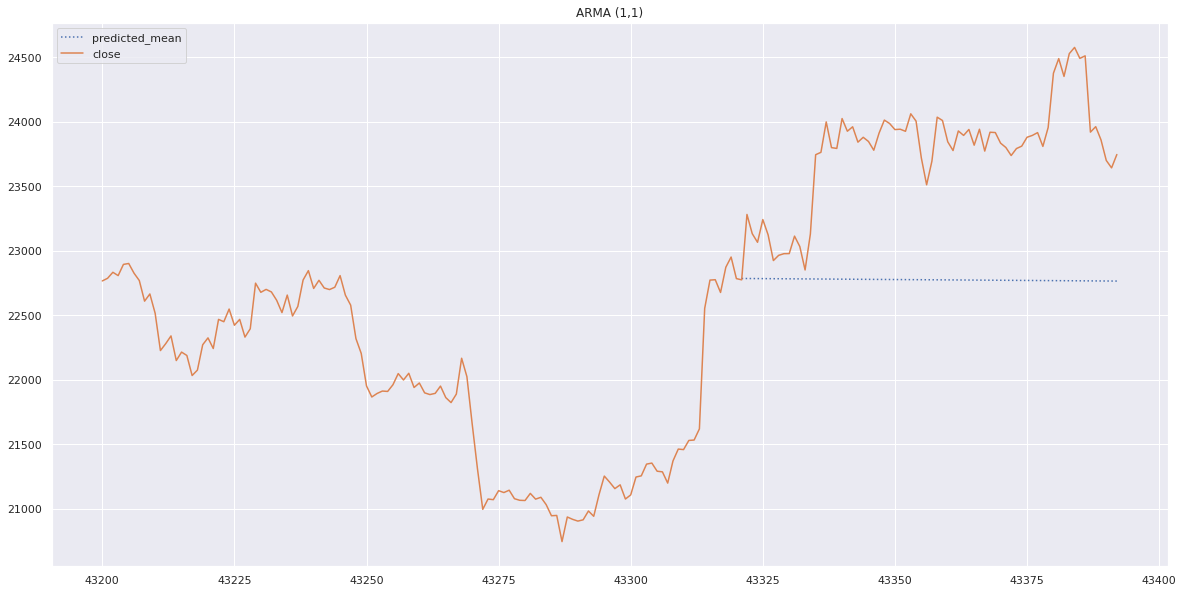

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close, order = (1,0,1))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date)
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'ARMA (1,1)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'ARMA (1,1)')

## ARMA (5,5)

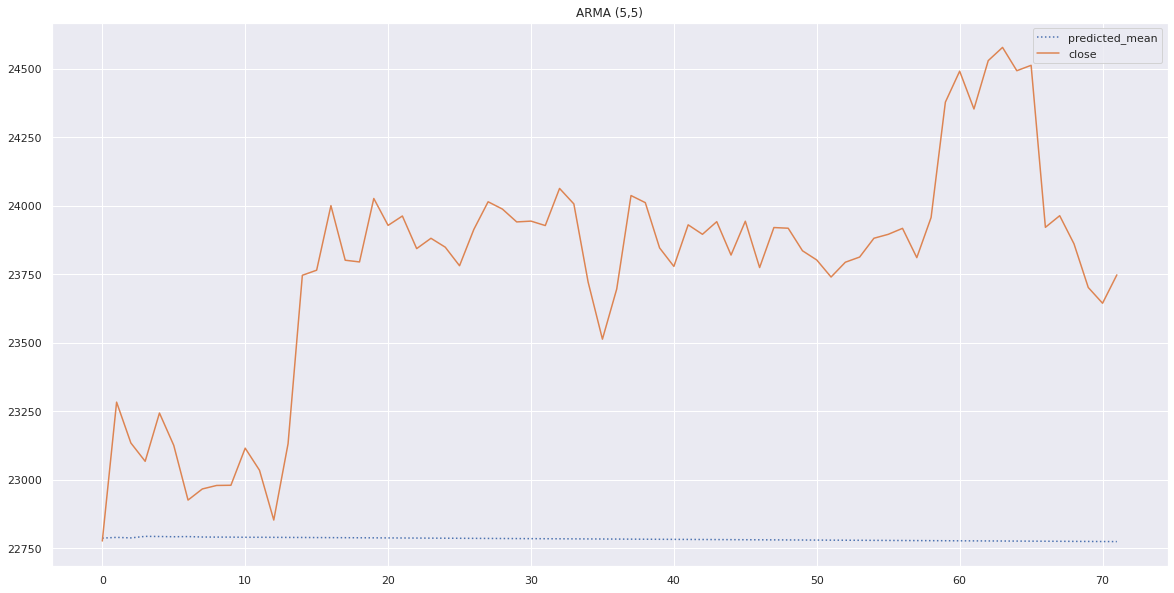


Evaluated model: ARMA (5,5)
Mean absolute error: 983.0474246357654
Root mean squared error: 1067.374913145932


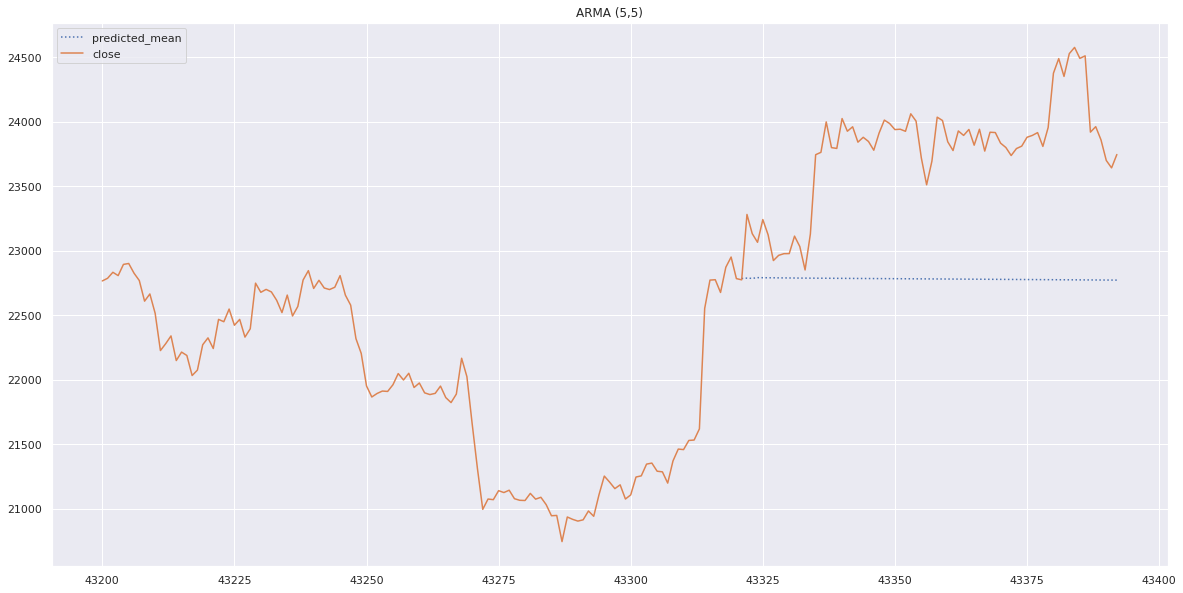

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close, order = (5,0,5))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date)
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'ARMA (5,5)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'ARMA (5,5)')

## ARMA (8,8)

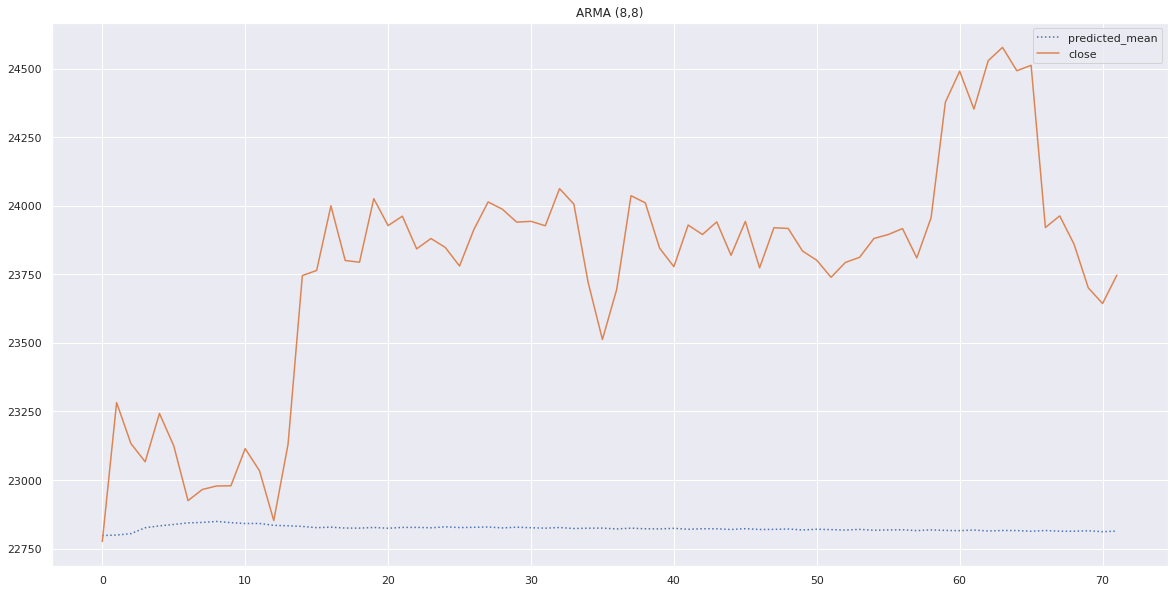


Evaluated model: ARMA (8,8)
Mean absolute error: 942.7514293605176
Root mean squared error: 1030.3306065024155


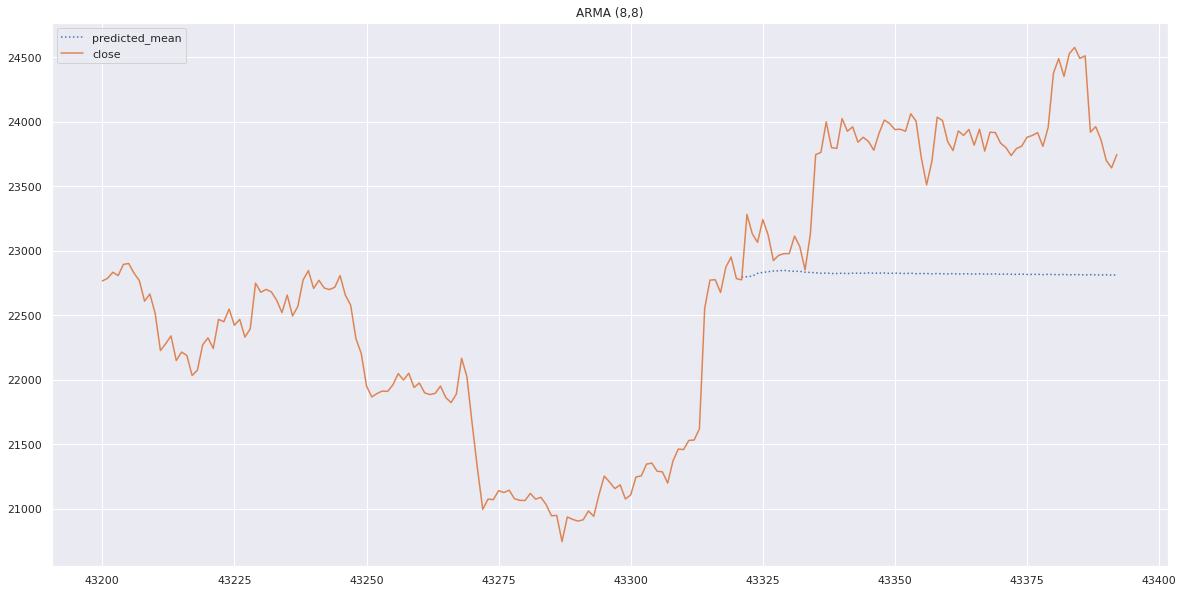

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close, order = (8,0,8))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date)
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'ARMA (8,8)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'ARMA (8,8)')

### ARMAX

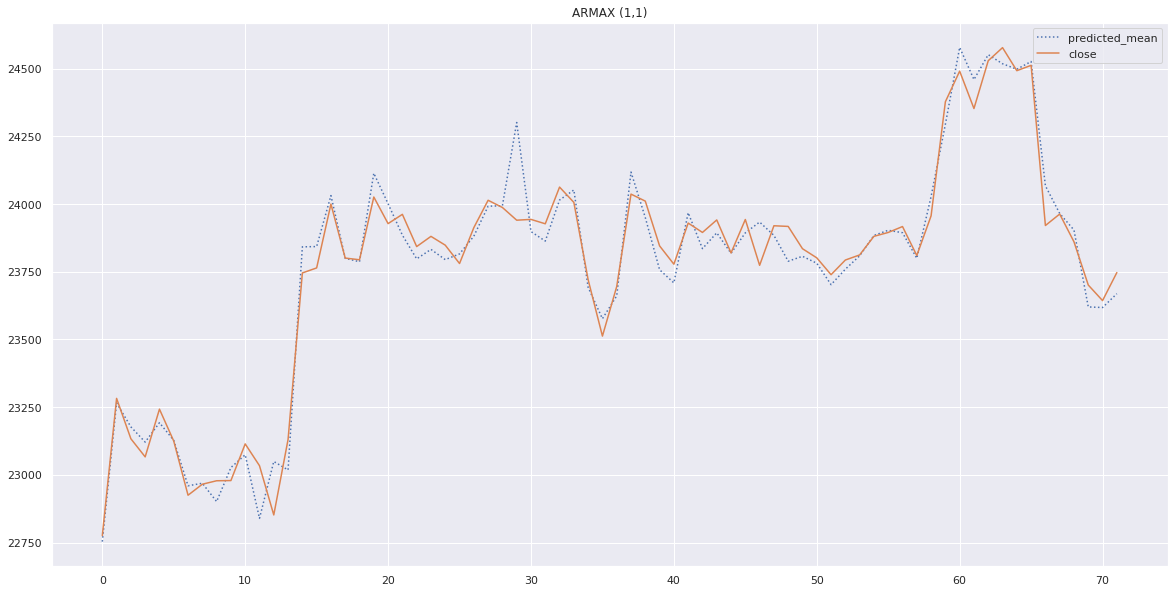


Evaluated model: ARMAX (1,1)
Mean absolute error: 56.86312615710884
Root mean squared error: 79.31577238065924


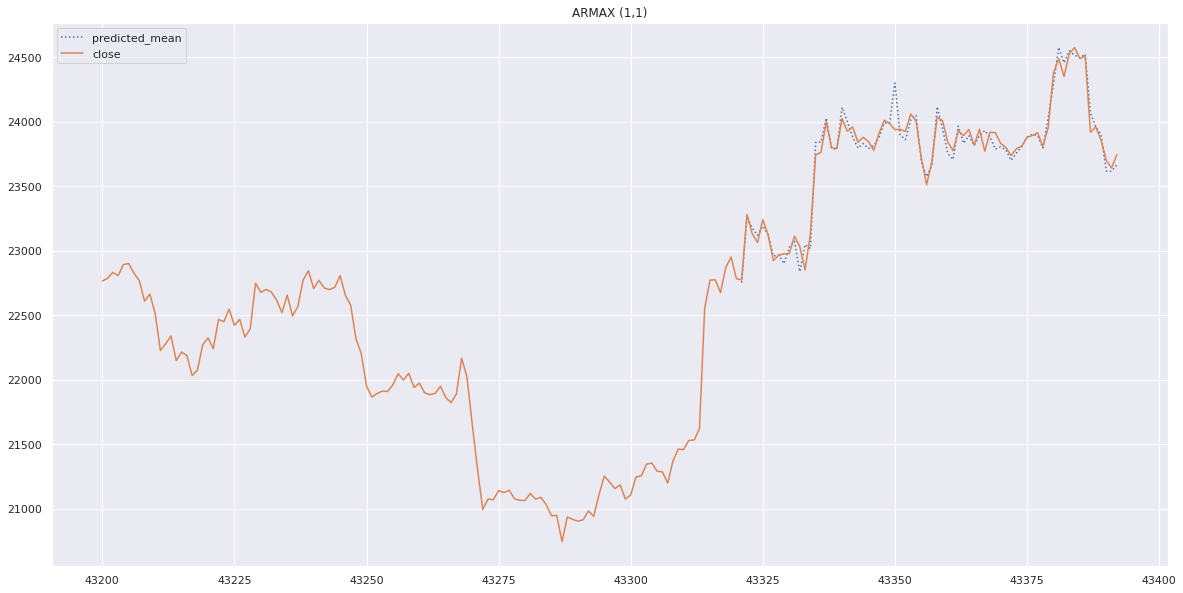

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close[1:], exog = df_train[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][1:], order = (1,0,1))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date,  exog = df_test[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][start_date:end_date])
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'ARMAX (1,1)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'ARMAX (1,1)')

## Armax (3,3)

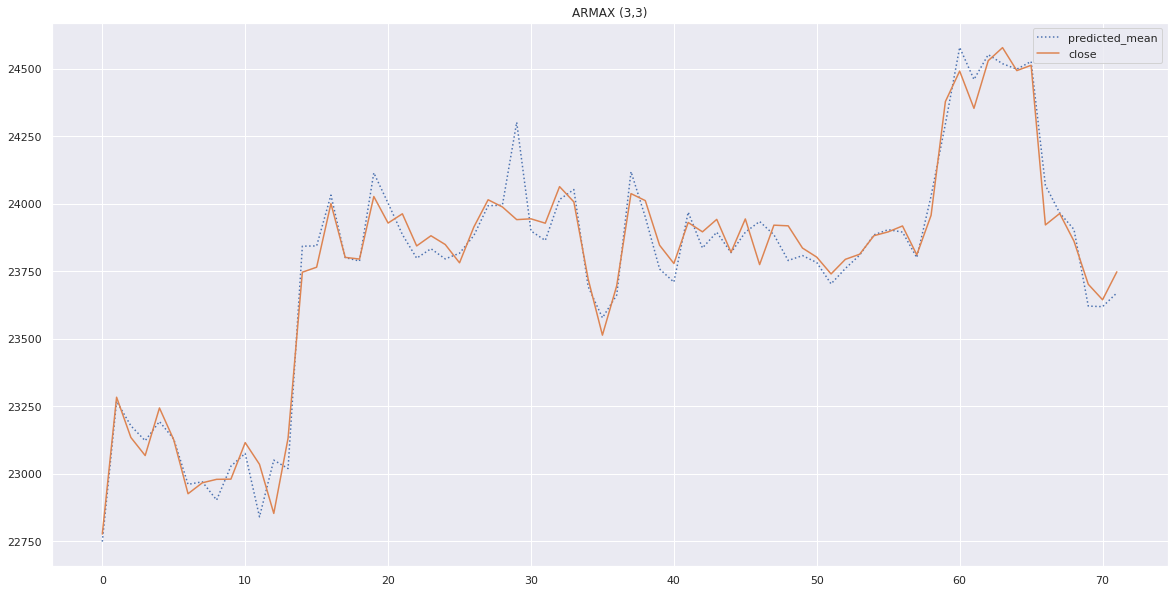


Evaluated model: ARMAX (3,3)
Mean absolute error: 56.913678899934034
Root mean squared error: 79.3338220864025


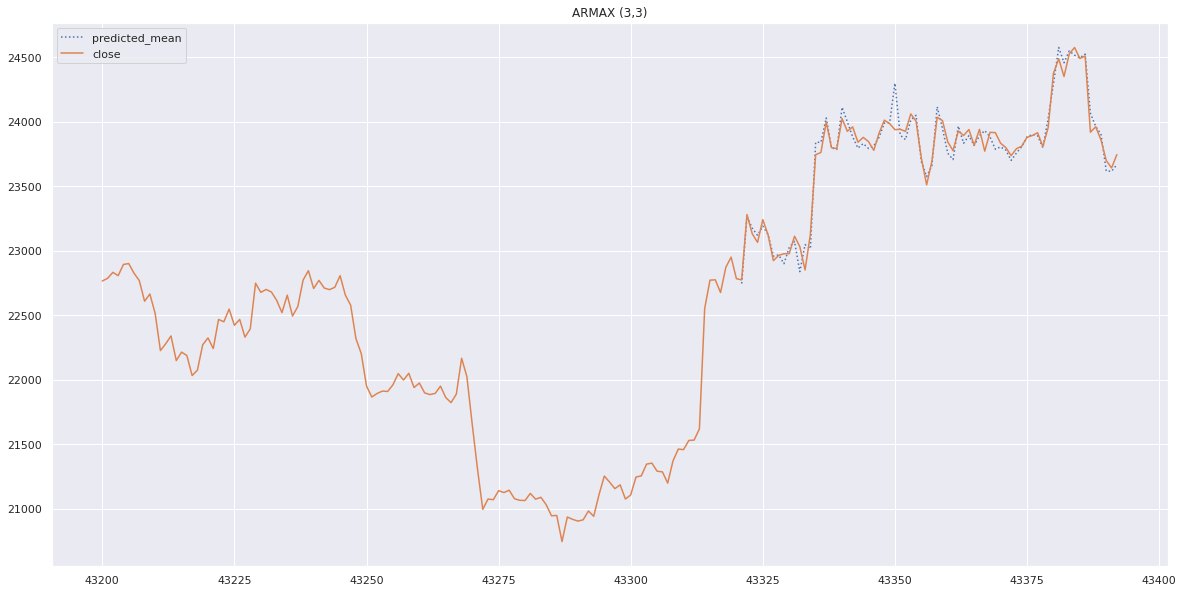

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close[1:], exog = df_train[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][1:], order = (3,0,3))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date,  exog = df_test[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][start_date:end_date])
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'ARMAX (3,3)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'ARMAX (3,3)')

## ARMAX(5,5)

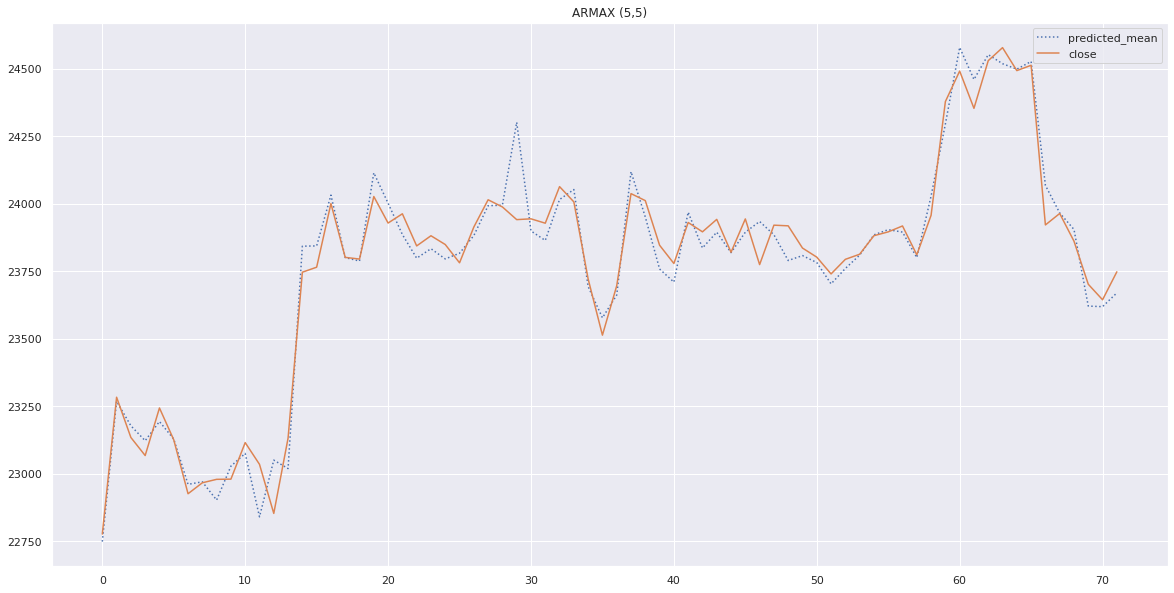


Evaluated model: ARMAX (5,5)
Mean absolute error: 56.913678899934034
Root mean squared error: 79.3338220864025


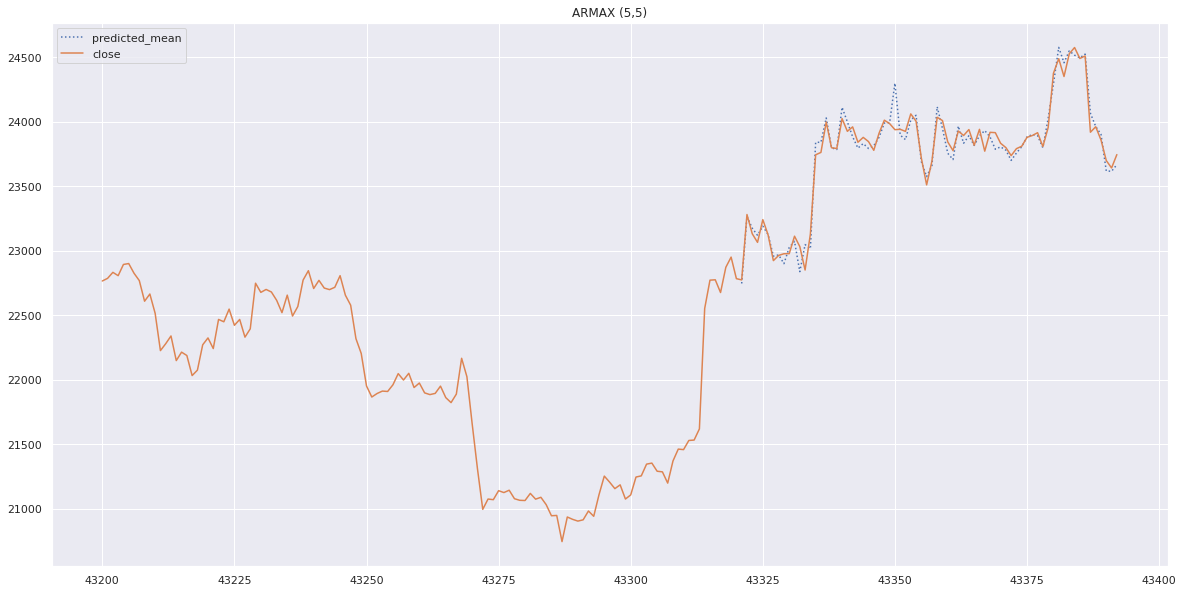

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_ar = sm.tsa.arima.ARIMA(df_train.close[1:], exog = df_train[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][1:], order = (5,0,5))
results_ar = model_ar.fit()
#Predictions
df_pred = results_ar.predict(start = start_date, end = end_date,  exog = df_test[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][start_date:end_date])
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'ARMAX (5,5)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'ARMAX (5,5)')

### SARMA

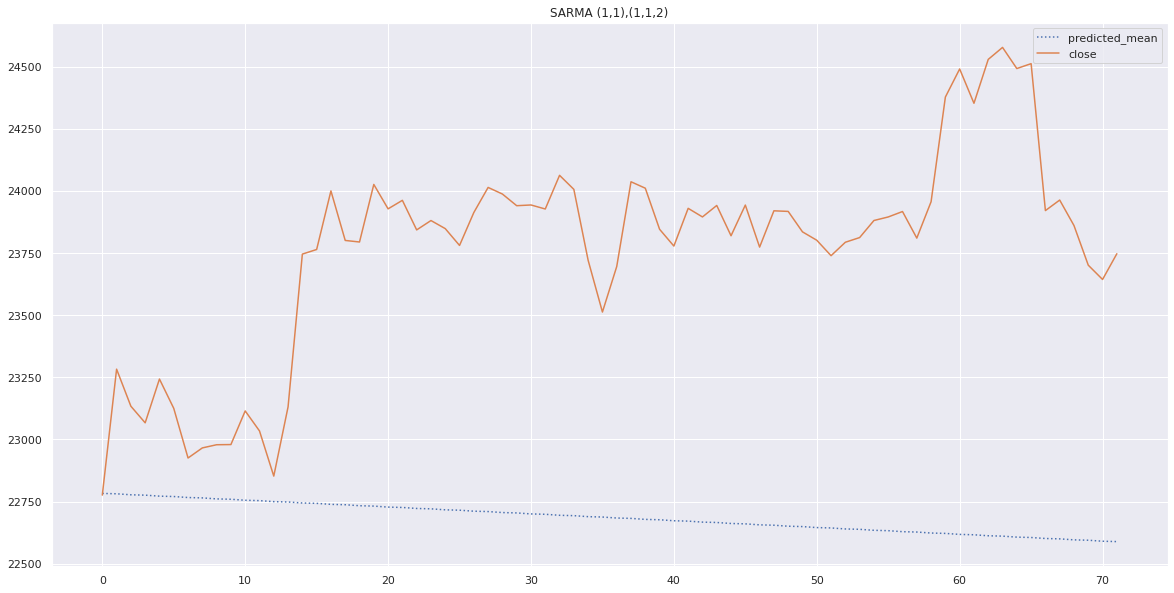


Evaluated model: SARMA (1,1),(1,1,2)
Mean absolute error: 1080.102033981915
Root mean squared error: 1171.6460133242294


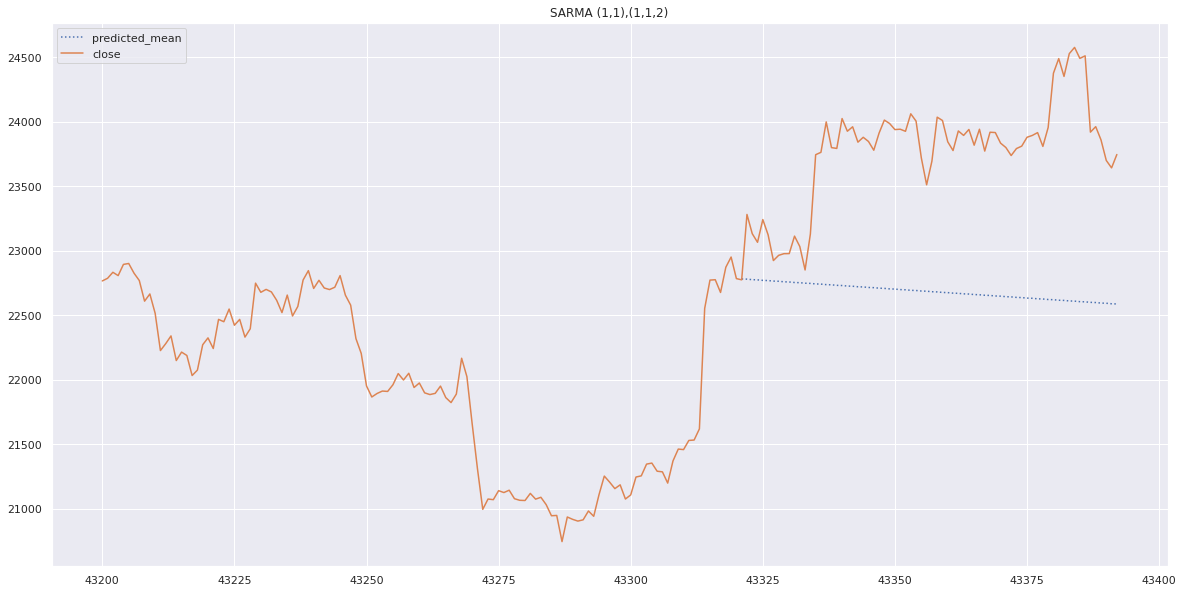

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_sarma = SARIMAX(df_train.close[1:], order = (1,0,1), seasonal_order = (1,0,1,2))
results_sarma = model_sarma.fit()
#Predictions
df_pred = results_sarma.predict(start = start_date, end = end_date)
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'SARMA (1,1),(1,1,2)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'SARMA (1,1),(1,1,2)')

## SARMA (3,4),(3,2,5)

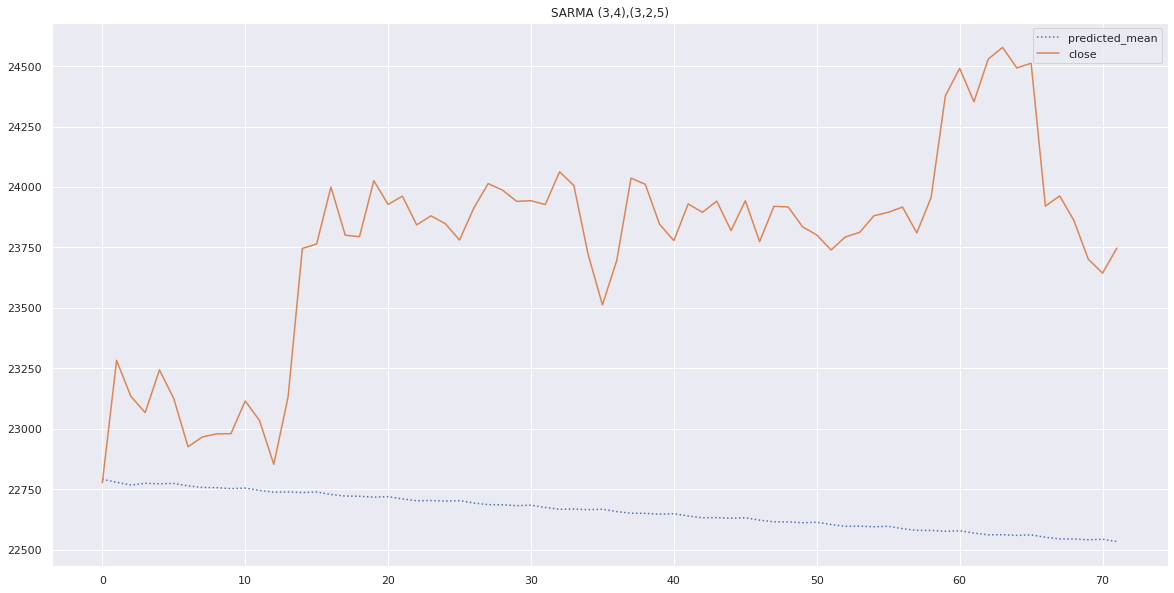


Evaluated model: SARMA (3,4),(3,2,5)
Mean absolute error: 1106.7831319886286
Root mean squared error: 1200.8721250627245


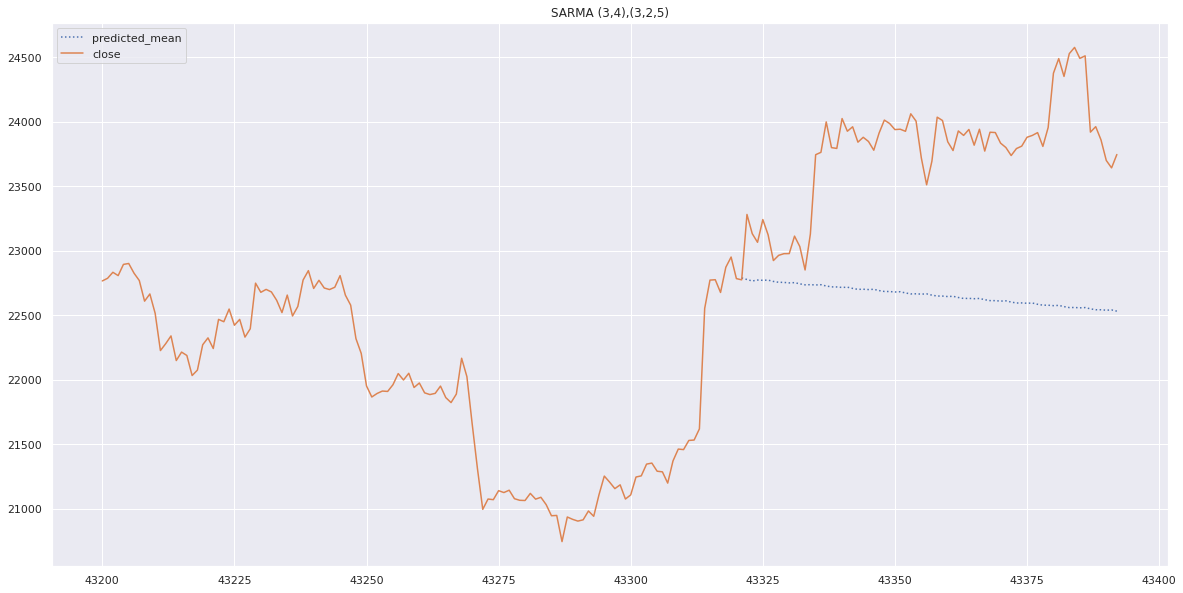

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_sarma = SARIMAX(df_train.close[1:], order = (3,0,4), seasonal_order = (3,0,2,5))
results_sarma = model_sarma.fit()
#Predictions
df_pred = results_sarma.predict(start = start_date, end = end_date)
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'SARMA (3,4),(3,2,5)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'SARMA (3,4),(3,2,5)')

### SARMAX (1,1),(1,1,2)

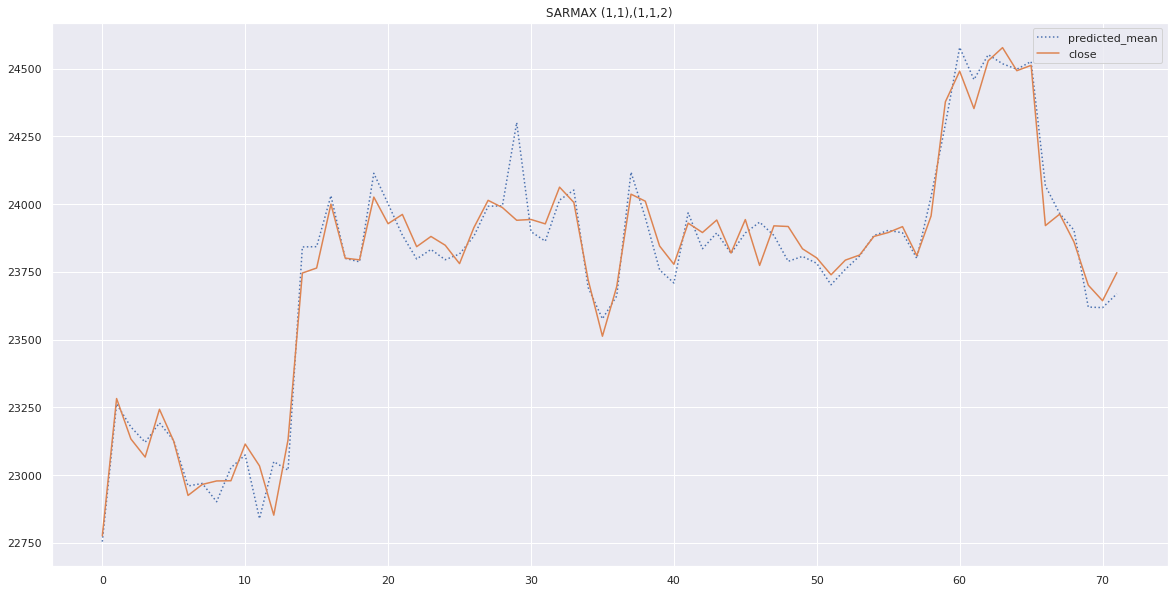


Evaluated model: SARMAX (1,1),(1,1,2)
Mean absolute error: 56.88989463568881
Root mean squared error: 79.32182710136925


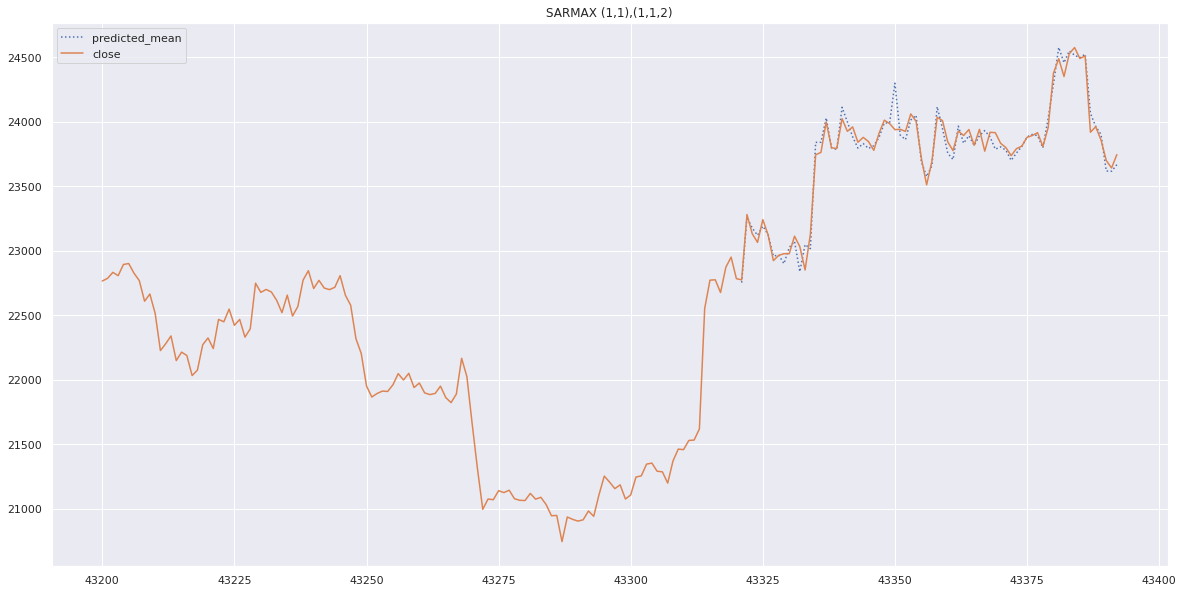

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_sarimax = sm.tsa.arima.ARIMA(df_train.close[1:], exog = df_train[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][1:], order = (1,0,1), seasonal_order = (1,0,1,2))
results_sarimax = model_sarimax.fit()
#Predictions
df_pred = results_sarimax.predict(start = start_date, end = end_date,  exog = df_test[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][start_date:end_date])
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'SARMAX (1,1),(1,1,2)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'SARMAX (1,1),(1,1,2)')

## SARMAX (3,4)(3,2,5)

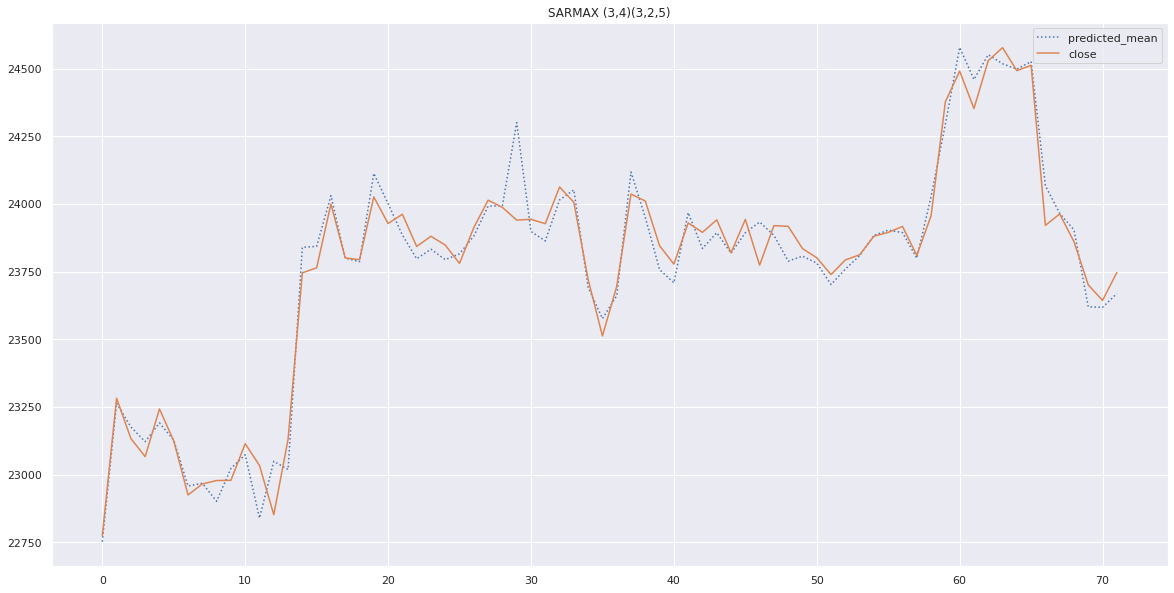


Evaluated model: SARMAX (3,4)(3,2,5)
Mean absolute error: 56.77750787416436
Root mean squared error: 79.21243049428566


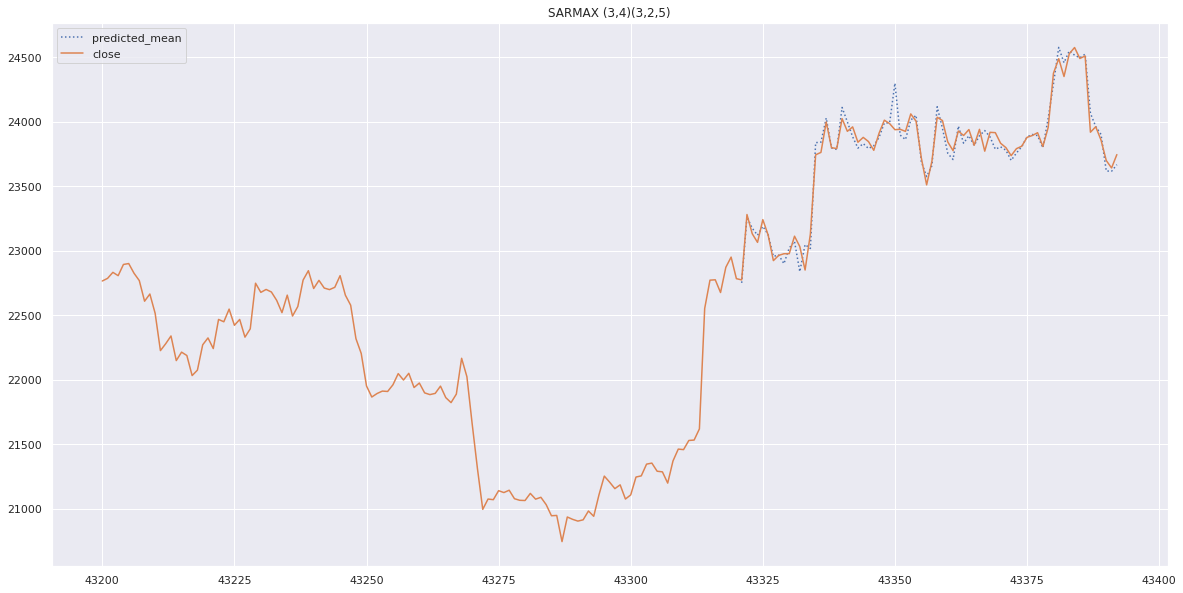

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_sarimax = sm.tsa.arima.ARIMA(df_train.close[1:], exog = df_train[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][1:], order = (3,0,4), seasonal_order = (3,0,2,5))
results_sarimax = model_sarimax.fit()
#Predictions
df_pred = results_sarimax.predict(start = start_date, end = end_date,  exog = df_test[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][start_date:end_date])
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'SARMAX (3,4)(3,2,5)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'SARMAX (3,4)(3,2,5)')

SARIMAX


### SARIMAX (1,1,1),(1,1,1,2)

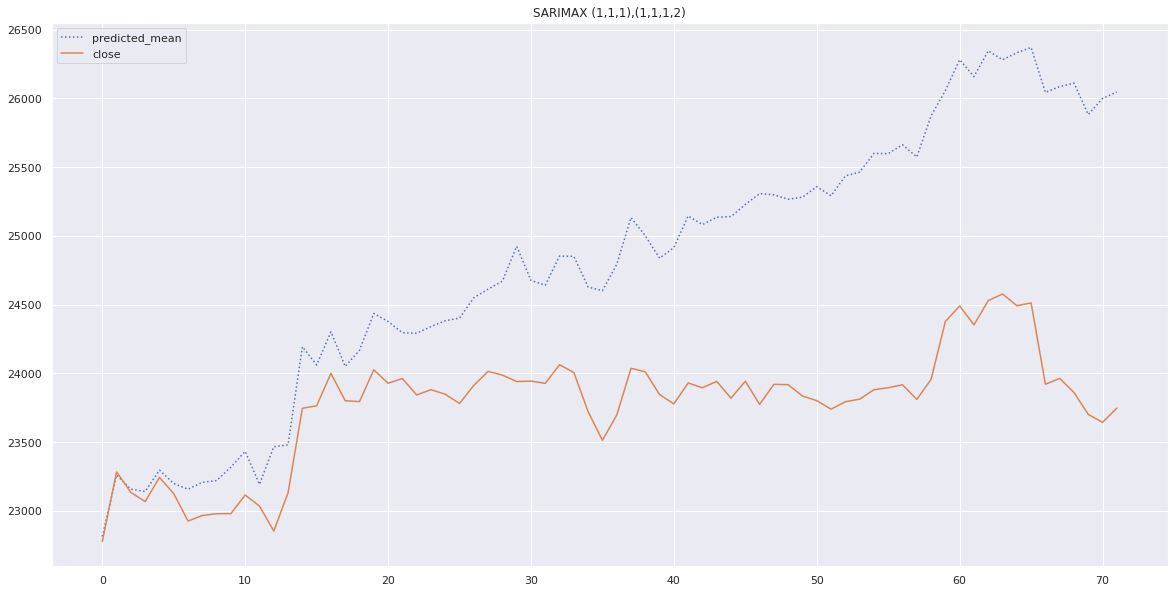


Evaluated model: SARIMAX (1,1,1),(1,1,1,2)
Mean absolute error: 1027.8415091058423
Root mean squared error: 1231.6033887794354


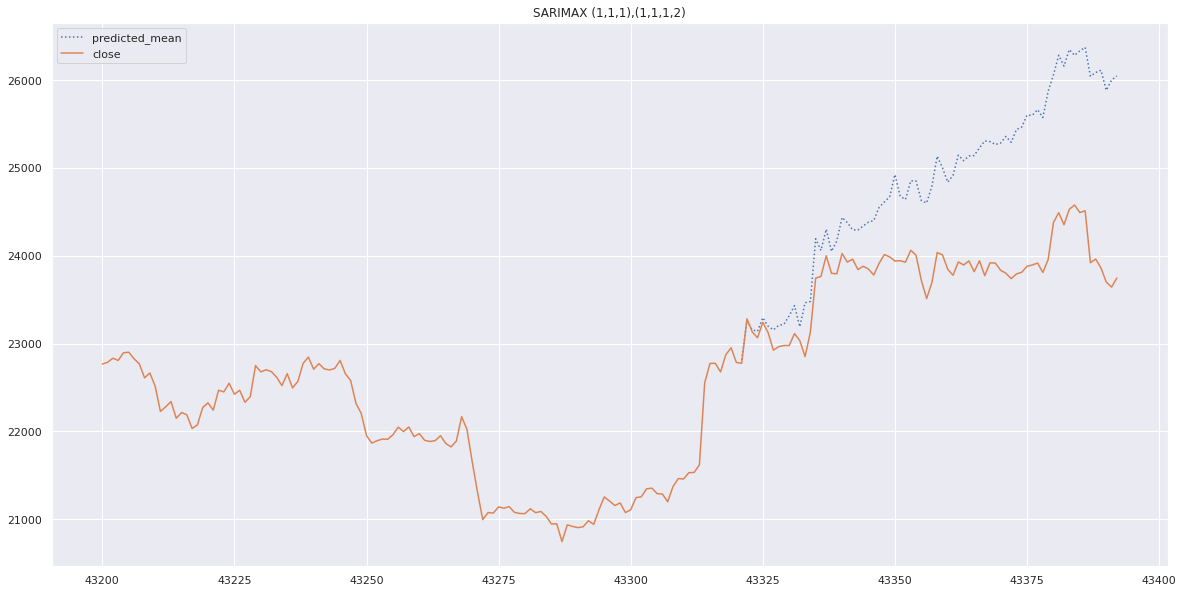

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_sarimax = sm.tsa.arima.ARIMA(df_train.close[1:], exog = df_train[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][1:], order = (1,1,1), seasonal_order = (1,1,1,2))
results_sarimax = model_sarimax.fit()
#Predictions
df_pred = results_sarimax.predict(start = start_date, end = end_date,  exog = df_test[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][start_date:end_date])
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'SARIMAX (1,1,1),(1,1,1,2)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'SARIMAX (1,1,1),(1,1,1,2)')

## SARIMAX (3,1,4)(3,1,2,5)

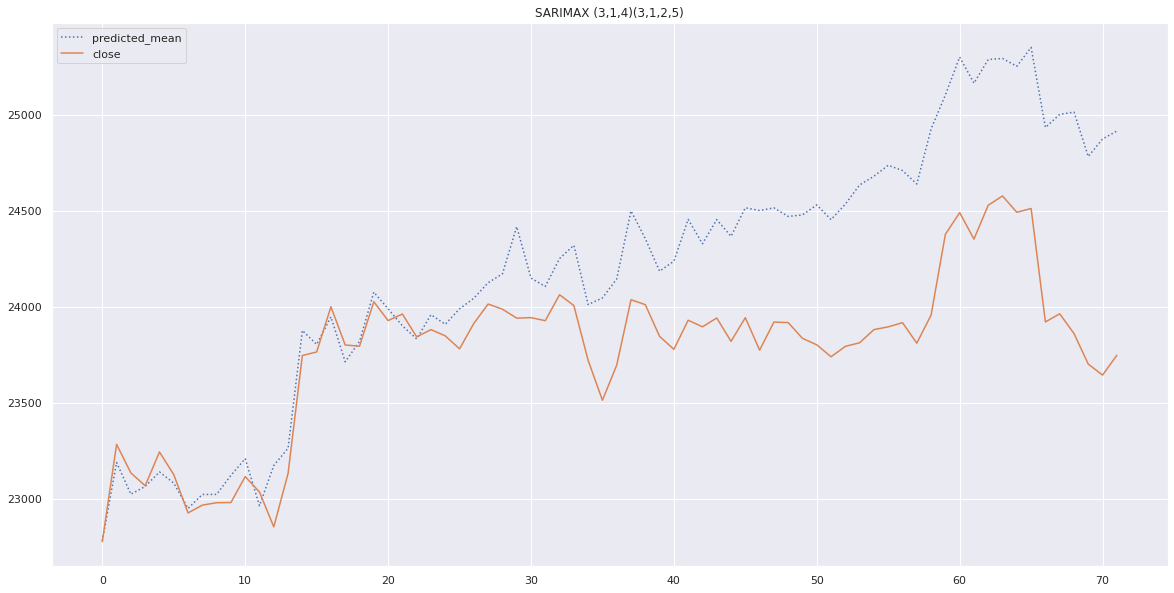


Evaluated model: SARIMAX (3,1,4)(3,1,2,5)
Mean absolute error: 434.0361073125866
Root mean squared error: 559.8272687827669


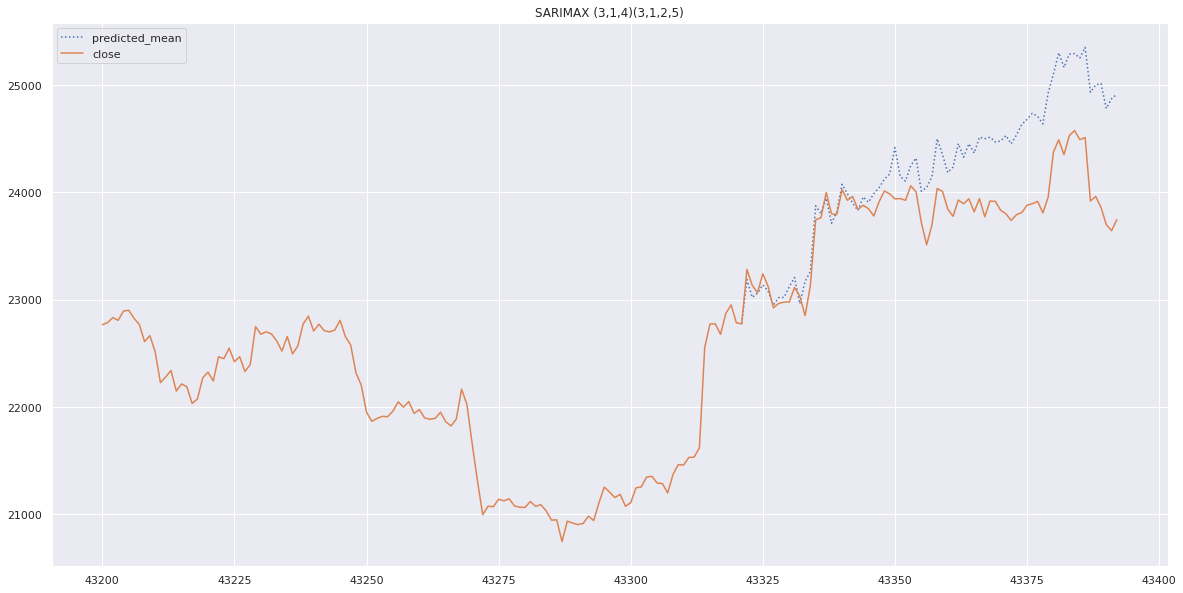

In [ ]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#Fitting the model
model_sarimax = sm.tsa.arima.ARIMA(df_train.close[1:], exog = df_train[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][1:], order = (3,1,4), seasonal_order = (3,1,2,5))
results_sarimax = model_sarimax.fit()
#Predictions
df_pred = results_sarimax.predict(start = start_date, end = end_date,  exog = df_test[["open","high","low","volume","qav","num_trades","taker_base_vol","taker_quote_vol"]][start_date:end_date])
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns = {0:'pred'})
#metrics
metric_df= pd.concat([df_pred, df1_test.reindex(df_pred.index)], axis=1)
show_graphp1(metric_df, 'SARIMAX (3,1,4)(3,1,2,5)')

metric_df= pd.concat([df_pred, df1.reindex(df1.index)], axis=1)
show_graphp2(metric_df, 'SARIMAX (3,1,4)(3,1,2,5)')